# Google Ads Data:-
# Competitive Analysis of Omnify: Uncovering Market Position and Strategies

#### -by Mayank Srivastava

1.	The competitive landscape in the software industry is dynamic and constantly evolving, and Omnify finds itself amid fierce competition. This report aims to provide a comprehensive analysis of Omnify competitors, their strengths and weaknesses, and strategies to gain a competitive advantage.

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

plt.style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
#loading the dataset
df1 =pd.read_excel('Task.xlsx', sheet_name= 'Google Ads Data')
df2 =pd.read_excel('Task.xlsx', sheet_name= 'Listing Site Data')

In [3]:
# checking shape of dataset
df1.shape, df2.shape

((418, 14), (2091, 12))

In [4]:
#checking for null values
pd.DataFrame({'Missing val': df2.isna().sum(), 'Missing val in %': round(df2.isna().sum()*100/len(df2),2)})

,Missing val,Missing val in %
Product Name,0,0.00
Categories,0,0.00
Date of Report,0,0.00
Average Position,1,0.05
Clicks,1,0.05
Leads,1928,92.20
Money Spent ($),2,0.10
Channel,0,0.00
Location,0,0.00
Prospects,2025,96.84


In [5]:
#checking info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   object        
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2089 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              14 non-null     float64       
 11  Paid Date         13 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 196.2+ KB


In [6]:
#changing data types

df2['Date of Report']=pd.to_datetime(df2['Date of Report'])
#df2.Clicks=df2.Clicks.astype('int')
#df2.Leads=df2.Leads.astype('int')
#df2.Prospects=df2.Prospects.astype('int')

### Extracting summary of all features

In [7]:
# column summary

for i in df2.columns:
    print(i)
    print(df2[i].unique())
    print(df2[i].nunique())
    print('-'*50)

Product Name
['Omnify']
1
--------------------------------------------------
Categories
['Coaching' 'Dance Studio' 'Personal Trainer' 'Scheduling'
 'Class Registration' 'Fitness' 'Swim School' 'Yoga Studio'
 'Camp Management' 'Music School' 'Reservations' 'Club Management'
 'Gymnastics' 'Venue Management' 'Membership Management'
 'Parks and Recreation' 'Spa' 'Martial Arts' 'Pilates Studio']
19
--------------------------------------------------
Date of Report
<DatetimeArray>
['2020-10-20 00:00:00', '2020-10-21 00:00:00', '2020-10-22 00:00:00',
 '2020-10-23 00:00:00', '2020-10-24 00:00:00', '2020-10-25 00:00:00',
 '2020-10-26 00:00:00', '2020-10-27 00:00:00', '2020-10-28 00:00:00',
 '2020-10-29 00:00:00',
 ...
 '2021-04-21 00:00:00', '2021-04-22 00:00:00', '2021-04-23 00:00:00',
 '2021-04-24 00:00:00', '2021-04-25 00:00:00', '2021-04-26 00:00:00',
 '2021-04-27 00:00:00', '2021-04-28 00:00:00', '2021-04-29 00:00:00',
 '2021-04-30 00:00:00']
Length: 190, dtype: datetime64[ns]
190
---------

In [8]:
# replacing values in Location column

df2.Location =df2.Location.replace(('UNITED STATES','UNITED KINGDOM','SINGAPORE','AUSTRALIA','CANADA','United States','United Kingdom', 'US'),
                                   ('USA','UK','Singapore','Australia','Canada','USA','UK','USA'))

### Descriptive stats

In [9]:
df2.describe(include='all')

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
count,2091,2091,2091,2090.000000,2090.000000,163.000000,2089.000000,2091,2091,66.000000,14.000000,13
unique,1,19,NaN,NaN,NaN,NaN,NaN,3,6,NaN,NaN,NaN
top,Omnify,Reservations,NaN,NaN,NaN,NaN,NaN,Capterra,USA,NaN,NaN,NaN
freq,2091,458,NaN,NaN,NaN,NaN,NaN,1211,982,NaN,NaN,NaN
mean,NaN,NaN,2021-01-27 13:47:05.251075840,10.731464,1.663636,1.141104,12.074318,NaN,NaN,1.030303,1675.714286,2021-03-27 14:46:09.230769152
min,NaN,NaN,2020-10-20 00:00:00,0.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,549.000000,2020-12-02 00:00:00
25%,NaN,NaN,2020-12-08 00:00:00,3.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,1032.000000,2021-03-05 00:00:00
50%,NaN,NaN,2021-01-20 00:00:00,8.000000,1.000000,1.000000,7.250000,NaN,NaN,1.000000,1788.000000,2021-03-20 00:00:00
75%,NaN,NaN,2021-03-07 00:00:00,13.000000,2.000000,1.000000,12.250000,NaN,NaN,1.000000,2023.500000,2021-04-05 00:00:00
max,NaN,NaN,2021-12-04 00:00:00,74.000000,80.000000,6.000000,1460.000000,NaN,NaN,2.000000,4000.000000,2021-12-27 00:00:00


Observations:
1. The Data set is for the Product named 'Omnify' 
2. There are 19 differnet Catgories covered in the dataset
3. Date of report ranges from 20-10-2020 to 04-12-2021
4. Observing the statistical data of 'Average Position' it can be said that:
    1. There is one missing value
    2. There are Outliers in the column
5. Observing the statistical data of 'Clicks' it can be said that:
    1. There is one missing value
    2. There are Outliers in the column
6. Avg. Money Spent($) is ads is 12.07 and max is USD 1460.00
7. Large No. of missing values (> 90%) in columns: Lead, Prospects, Paid and Paid Date
8. Average of Amt. Paid is USD 1675.71 and maximum Amt. Paid is USD 4000. 
9. Paid Date ranges from 02-12-2020 to 27-12-2021

### Checking the Amt. Paid vs Category relationship

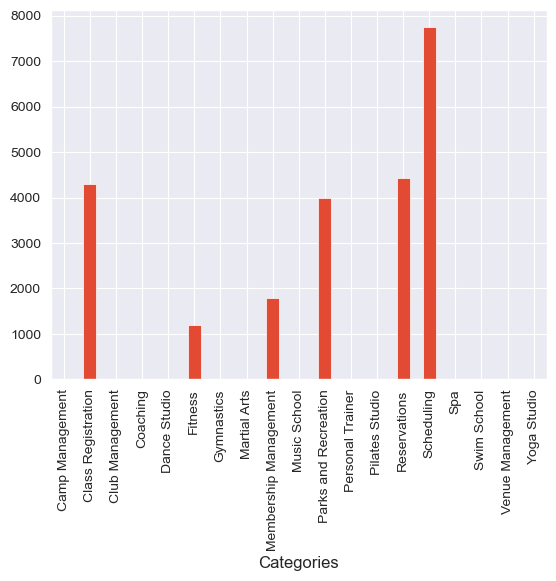

In [10]:
df2.groupby(['Categories'])['Paid'].sum().plot(kind= 'bar')
plt.show()
#df2.groupby(['Categories'])['Paid'].sum().sort_values(ascending = False)

Obseravtions:

2.	Camp Management, Club Management, Coaching, Dance Studio, Gymnastics, Martial Arts, Music School, Personal Trainer, Pilates Studio, Spa, Swim School, Venue Management, and Yoga Studio have a "Return" value of 0, indicating that no direct revenue has been generated from these categories during the given period. This suggests that either these businesses have not yet started earning profits, or the data provided does not capture their income.

### Checking the Amt. Paid and Money Spent vs Category

,Money Spent ($),Paid
Categories,,
Camp Management,48.00,0.0
Class Registration,2910.50,4303.0
Club Management,245.50,0.0
Coaching,1003.25,0.0
Dance Studio,202.25,0.0
Fitness,1238.50,1188.0
Gymnastics,6.00,0.0
Martial Arts,2.00,0.0
Membership Management,4273.85,1788.0


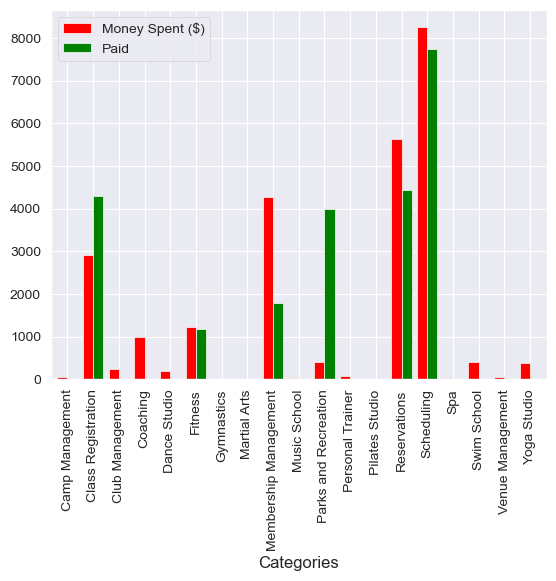

In [11]:
df2.groupby(['Categories'])[['Money Spent ($)','Paid']].sum().plot(kind= 'bar', color=['red', 'green'], width=0.8)
df2.groupby(['Categories'])[['Money Spent ($)','Paid']].sum()

Observation:

3.	Class Registration, Fitness, Membership Management, and Reservations have positive ROI values, indicating that they have earned more money than they spent during the period under consideration.

,Money Spent ($),Paid,ROI
Categories,,,
Parks and Recreation,418.65,4000.0,9.55
Class Registration,2910.50,4303.0,1.48
Fitness,1238.50,1188.0,0.96
Scheduling,8246.00,7744.0,0.94
Reservations,5627.75,4437.0,0.79
Membership Management,4273.85,1788.0,0.42
Camp Management,48.00,0.0,0.00
Pilates Studio,3.50,0.0,0.00
Venue Management,52.75,0.0,0.00


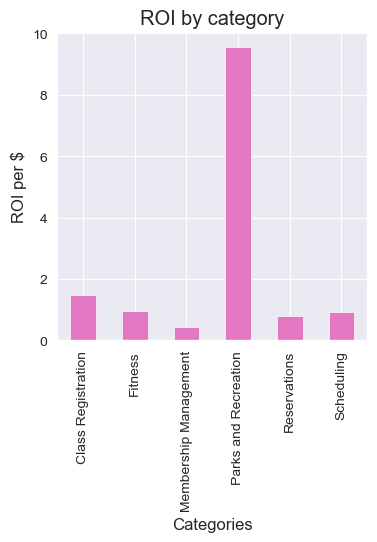

In [12]:
#Calculation ROI of all Categories.

data=df2.groupby(['Categories'])[['Money Spent ($)','Paid']].sum()
data['ROI']=round(data['Paid']/data['Money Spent ($)'],2)
plt.figure(figsize =(4,4))
data.ROI[data.ROI>0].plot(kind = 'bar', color = 'tab:pink')
plt.title('ROI by category')
plt.ylabel('ROI per $')

data.sort_values(by='ROI', ascending = False)

###  Coming on to channel wise return on investment

In [13]:
data=df2.groupby(['Channel'])[['Money Spent ($)','Paid']].sum()
data['ROI (%)']=round(data['Paid']*100/data['Money Spent ($)'],2)
a= lambda x:x-100 if x>100 else -(100-x)
data['ROI (%)']=list(map(a, data['ROI (%)']))
data['Profit ($)']=data['Paid']-data['Money Spent ($)']
data.sort_values(by='ROI (%)', ascending = False)



,Money Spent ($),Paid,ROI (%),Profit ($)
Channel,,,,
Software Advice,311.50,1794.0,475.92,1482.50
Capterra,19461.85,19878.0,2.14,416.15
GetApp,5449.90,1788.0,-67.19,-3661.90


In [14]:
print('Overall Marketing efforts (P/L) in USD:', round(sum(data['Profit ($)']),2))

Overall Marketing efforts (P/L) in USD: -1763.25


Observations:

7. Higher ROI indicates better performance. 
8. Capterra: 2.14%
9. GetApp: -67.19%
10. Software Advice: 475.92%
11. Among the channels listed, Software Advice has the highest ROI, indicating that it is doing better in terms of generating returns compared to the money spent.
12. Capterra is performing well, with a profit of USD 416.15. You might want to invest more in this channel as it seems to generate a positive return on investment.
13. GetApp is currently experiencing a significant loss of USD -3661.9. You may want to evaluate the performance of this channel and identify any potential issues that are leading to such losses. Consider reevaluating your strategy for GetApp or reduce spending until improvements are made.
14. Software Advice shows a profit of USD 1482.5. This channel is performing relatively well, but you could still analyze its performance further to optimize the return.
15. The overall marketing efforts are resulting in a total loss of -$1763.25. It would be essential to analyze the reasons behind this loss and see if there are any overarching trends affecting multiple channels. Consider focusing more on high-performing channels and reevaluating those that are causing losses.

### Coming on to Location wise ROI and Profit

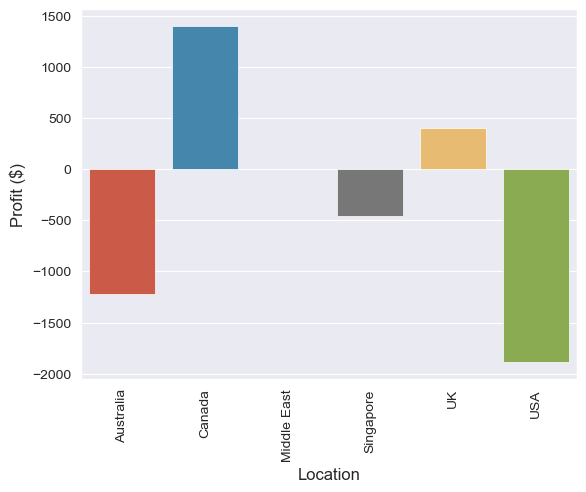

,Location,Money Spent ($),Paid,Profit ($)
1,Canada,1369.75,2768.0,1398.25
4,UK,4361.85,4768.0,406.15
2,Middle East,0.00,0.0,0.00
3,Singapore,2243.25,1788.0,-455.25
0,Australia,1224.25,0.0,-1224.25
5,USA,16024.15,14136.0,-1888.15


In [15]:
data=df2.groupby(['Location'])[['Money Spent ($)','Paid']].sum()
data['Profit ($)']=data['Paid']-data['Money Spent ($)']
data.reset_index(inplace= True)
sns.barplot(x= 'Location',y= 'Profit ($)', data= data)
plt.xticks(rotation =90)
plt.show()

data.sort_values(by= 'Profit ($)', ascending = False)

In [16]:
# We can see ZERO return in Australia, despite investment of USD 1224.25, lets check the channel wise performance
print('Analysing ZERO return in Australia')
df2[df2.Location == 'Australia'].groupby('Channel')[['Money Spent ($)','Paid']].sum()

Analysing ZERO return in Australia


,Money Spent ($),Paid
Channel,,
Capterra,792.50,0.0
GetApp,425.75,0.0
Software Advice,6.00,0.0


In [17]:
print('Analysing Middle East')
df2[df2.Location == 'Middle East']

Analysing Middle East


,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
195,Omnify,Club Management,2020-11-08,1.0,1.0,1.0,NaN,Capterra,Middle East,1.0,NaN,NaT


Observations:

16. Positive Profit in the UK: The United Kingdom is performing well with positive profit numbers. Consider studying the factors contributing to this success and try to replicate them in other regions.
17. High sales revenue but negative profit: Some regions like the USA and Singapore are generating high sales revenue but still experiencing losses. This situation suggests the need to review the cost structure and pricing strategy to ensure profitability.
18. Losses in AUSTRALIA across all channels: Australia is consistently showing losses across all channels. Evaluate the market conditions and demand in Australia to understand if there are any issues affecting performance in this region.
19. Losses in various regions: Many regions are showing losses in their profit and loss statements. It is essential to analyze the reasons behind these losses and take appropriate actions to improve the financial performance.
20. Focus on Canada and the United States: Canada and the United States are generating significant sales revenue, but they also have substantial losses. It might be beneficial to closely examine the operations in these regions and identify areas for cost optimization or revenue enhancement.


24. Missing data: The "Middle East" region for the Capterra channel has no data for money spent, sales revenue, or profit/losses. Ensure that all necessary data is collected and accounted for to get a comprehensive view of the company's financial performance.
25. Consider regional factors: Each region has its unique market characteristics, customer preferences, and competitive landscape. Take these factors into account when formulating strategies for each location.
26. Explore opportunities for growth: Identify regions with growth potential and invest resources strategically to tap into these opportunities 

### Some additonal observations

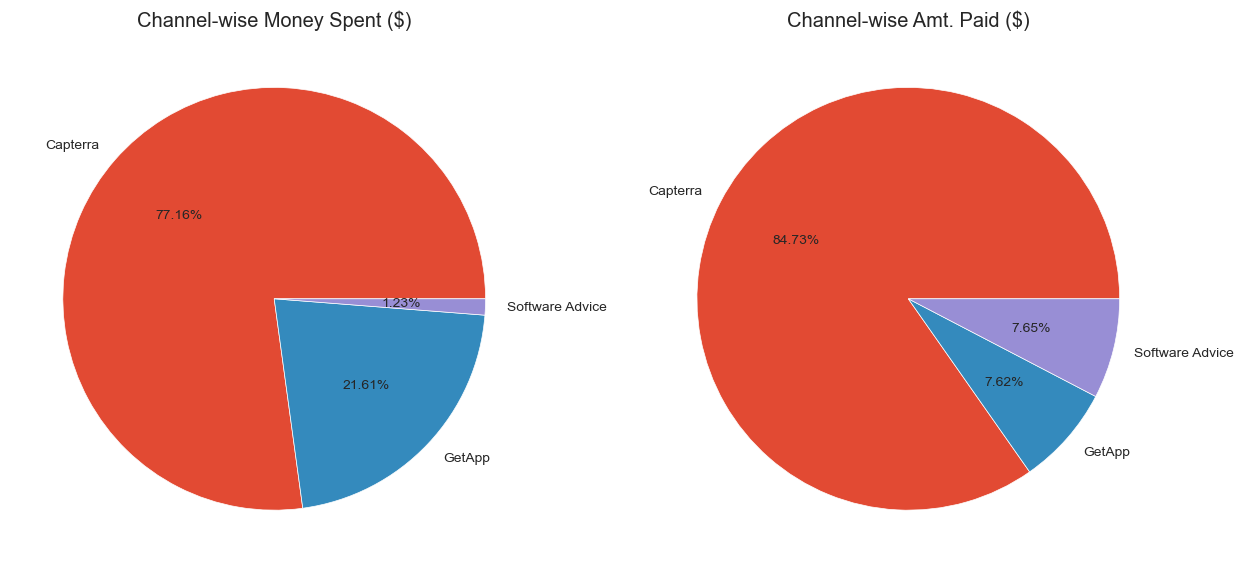

In [18]:
# Money spend Channel wise

data1=df2['Money Spent ($)'].groupby(df2.Channel).sum()
data2=df2['Paid'].groupby(df2.Channel).sum()
plt.figure(figsize =(15,10))

plt.subplot(1,2,1)
plt.pie(data1.values, labels =data1.index, autopct = '%0.2f%%')
plt.title('Channel-wise Money Spent ($)')
plt.subplot(1,2,2)
plt.pie(data2.values, labels =data1.index, autopct = '%0.2f%%')
plt.title('Channel-wise Amt. Paid ($)')
plt.show()

Obseravtions:
    
    1. Channel with highst ROI % of narly 475% is receiving the minimum investment, perhaps reallocation of funds is needed to increase the profit of Omnify.

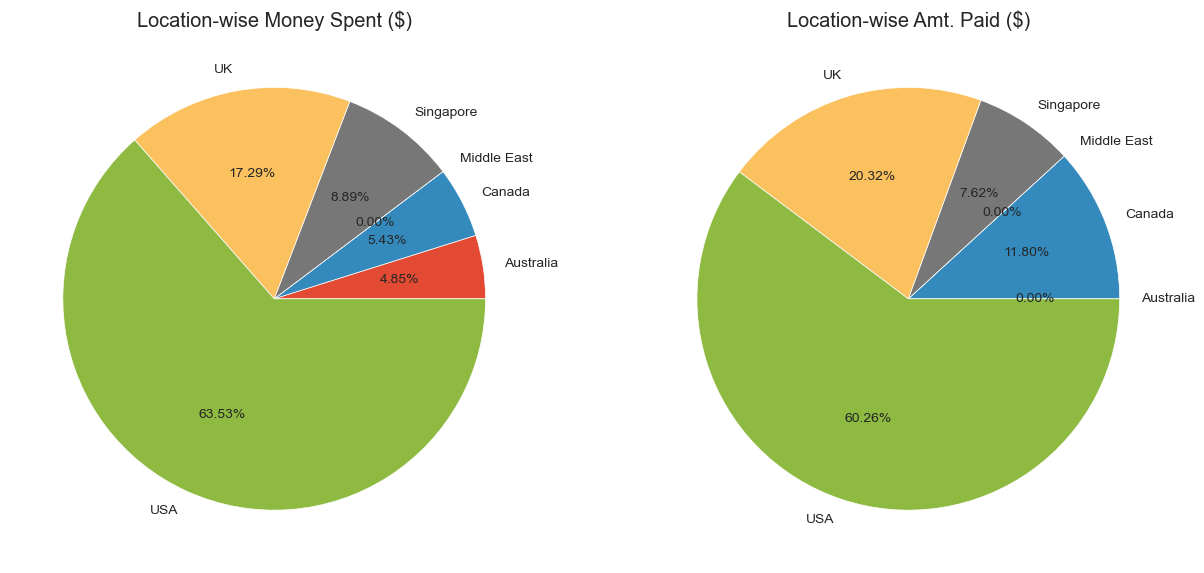

In [19]:
# Money spend Location wise

data1=df2['Money Spent ($)'].groupby(df2.Location).sum()
data2=df2['Paid'].groupby(df2.Location).sum()
plt.figure(figsize =(15,10))

plt.subplot(1,2,1)
plt.pie(data1.values, labels =data1.index, autopct = '%0.2f%%')
plt.title('Location-wise Money Spent ($)')
plt.subplot(1,2,2)
plt.pie(data2.values, labels =data1.index, autopct = '%0.2f%%')
plt.title('Location-wise Amt. Paid ($)')
plt.show()

In [20]:
df2.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20,13.0,1.0,NaN,2.0,Capterra,USA,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20,20.0,1.0,NaN,2.0,Capterra,UK,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20,6.0,1.0,NaN,2.0,Capterra,Singapore,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20,59.0,1.0,NaN,2.0,GetApp,USA,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21,6.0,1.0,NaN,2.0,Capterra,Australia,NaN,NaN,NaT


In [21]:
# Exploring Leads and Prospects
df2.groupby('Location')[['Leads', 'Prospects']].sum()

,Leads,Prospects
Location,,
Australia,8.0,4.0
Canada,11.0,5.0
Middle East,1.0,1.0
Singapore,28.0,8.0
UK,21.0,7.0
USA,117.0,43.0


In [22]:
df2.groupby('Channel')[['Leads', 'Prospects']].sum()

,Leads,Prospects
Channel,,
Capterra,138.0,50.0
GetApp,44.0,15.0
Software Advice,4.0,3.0


In [23]:
df2[df2.Location == 'USA'].groupby('Categories')[['Leads', 'Prospects']].sum().sort_values(by= 'Leads', ascending = False)

,Leads,Prospects
Categories,,
Reservations,39.0,15.0
Scheduling,27.0,3.0
Class Registration,22.0,15.0
Membership Management,15.0,5.0
Coaching,4.0,0.0
Swim School,4.0,0.0
Fitness,3.0,3.0
Parks and Recreation,3.0,2.0
Camp Management,0.0,0.0


Observations:
 
1. Large no. of Leads and Prospects are present under Location: USA and Channel: Capterra, that can be converted to Opportunity and must be contacted by the Sales team.
2. Under USA maximum interest is shown under following categories:Reservations,Scheduling, Class Registration and Membership Management

# ---------------------------------------End of Report---------------------------------------------------